In [70]:
import pandas as pd

df=pd.read_csv('Clean_Dataset.csv')

df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# How many airlines are there in the dataset

In [71]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

> source cities

In [72]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

> Destination city

In [73]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [74]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [75]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [76]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [77]:
# Because the class is the python keyword

df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [78]:
df['duration'].min()

0.83

In [79]:
df['duration'].max()

49.83

In [80]:
df['duration'].median()

11.25

#  Preprocessing 

In [81]:
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('flight',axis=1)

df['class']=df['class'].apply(lambda x: 1 if x=='Business' else 0)

In [82]:
df.stops=pd.factorize(df.stops)[0]

In [83]:
df['airline']


0         SpiceJet
1         SpiceJet
2          AirAsia
3          Vistara
4          Vistara
            ...   
300148     Vistara
300149     Vistara
300150     Vistara
300151     Vistara
300152     Vistara
Name: airline, Length: 300153, dtype: object

In [84]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [85]:
df=df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline',axis=1)
df=df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city',axis=1)
df=df.join(pd.get_dummies(df.destination_city, prefix='destination')).drop('destination_city',axis=1)
df=df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time',axis=1)
df=df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time',axis=1)


In [90]:
boolean_columns = df.select_dtypes(include='bool').columns

# Create a copy of the DataFrame to add the new columns
df_new = df.copy()

# Convert boolean columns to integers and add as new columns
for col in boolean_columns:
    new_col_name = col + '_int'
    df_new[new_col_name] = df_new[col].astype(int)

print(df_new)

        stops  class  duration  days_left  price  airline_AirAsia  \
0           0      0      2.17          1   5953                0   
1           0      0      2.33          1   5953                0   
2           0      0      2.17          1   5956                1   
3           0      0      2.25          1   5955                0   
4           0      0      2.33          1   5955                0   
...       ...    ...       ...        ...    ...              ...   
300148      1      1     10.08         49  69265                0   
300149      1      1     10.42         49  77105                0   
300150      1      1     13.83         49  79099                0   
300151      1      1     10.00         49  81585                0   
300152      1      1     10.08         49  81585                0   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
0                       0                 0               0                 1   
1        

# Training regression model

In [49]:
# pip install scikit-learn

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X,y=df.drop('price',axis=1),df.price


# Split train and test data

In [92]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=0.2)

In [94]:
reg=RandomForestRegressor(n_jobs=-1)
reg.fit(X_train,Y_train)

RandomForestRegressor(n_jobs=-1)

In [95]:
reg.score(x_test,y_test)

0.9855900546661699

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
Y_pred=reg.predict(x_test)

print("R2",r2_score(y_test,Y_pred))
print("MAE",mean_absolute_error(y_test,Y_pred))
print("MSE",mean_squared_error(y_test,Y_pred))
print("RMSE",math.sqrt(mean_absolute_error(y_test,Y_pred)))

R2 0.9855900546661699
MAE 1063.1870274108858
MSE 7414994.9494580915
RMSE 32.60654884238572


Text(0.5, 1.0, 'Prediction Vs Actual price')

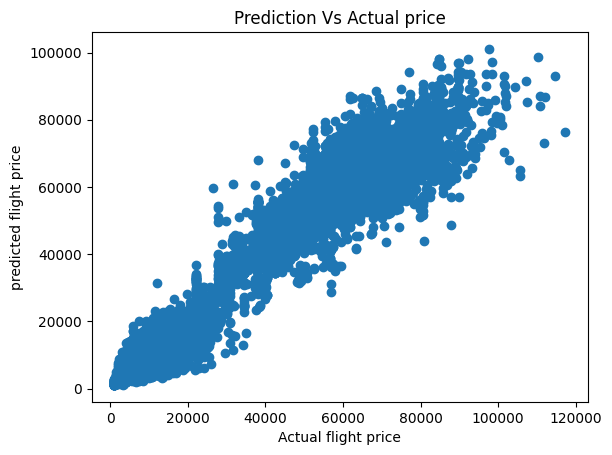

In [102]:
import matplotlib.pyplot as plt
plt.scatter(y_test,Y_pred)
plt.ylabel("predicted flight price")
plt.xlabel("Actual flight price")
plt.title("Prediction Vs Actual price")


In [103]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64